In [1]:
import sys, glob
from numpy import concatenate
sys.path.insert(0,'/Users/tizi/Documents/YALE_WL.nosync/purity-monitor/Jupyter/runner')
from runner import Runner

In [2]:
files = glob.glob(r'/Users/tizi/Documents/YALE_WL.nosync/data/20220812/SRS_Gain_100/4Vpp_3min_0.2V_intervals/**/*')

files2 = glob.glob(r'/Users/tizi/Documents/YALE_WL.nosync/data/20220814/4Vpp_3min_0.2V_intervals/**/*')
#files = glob.glob(r'/gpfs/gibbs/project/david_moore/ab2935/Data/20220812/SRS_Gain_100/4Vpp_3min_0.2V_intervals/10.0kHz/*')

files3 = concatenate((files,files2))
#files3 = '/Users/tizi/Documents/YALE_WL.nosync/data/20220812/SRS_Gain_100/4Vpp_3min_0.2V_intervals/10.0kHz/mca_keith_30.00OV_0.h5'

30.8  @  10.0  -> creating new


IntProgress(value=0, bar_style='info', description='Loading MCA perms...', layout=Layout(width='100%'), max=10…

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:756: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma


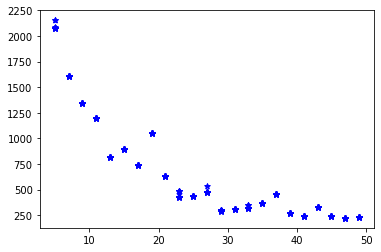

Selected (5, 14) for 2154.354436722873 best quality!


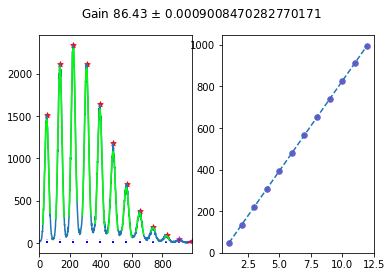

In [3]:
Bolt = Runner()
Bolt.min_peaks = 5
res = Bolt.magic('/Users/tizi/Documents/YALE_WL.nosync/data/20220812/SRS_Gain_100/4Vpp_3min_0.2V_intervals/10.0kHz/mca_keith_30.80OV_0.h5',{},reload=True)
#print(Bolt)

In [8]:
#print(Bolt.keys())
"""frequencies = {}

for key in Bolt.keys():
    voltage = float(str(key).split('@')[0])
    freq = float(str(key).split('@')[1])
    gain, error = Bolt[key]

    if not freq in list(frequencies.keys()): frequencies[freq] = ([],[],[])

    frequencies[freq][0].append(voltage)
    frequencies[freq][1].append(gain)
    frequencies[freq][2].append(error)"""

"frequencies = {}\n\nfor key in Bolt.keys():\n    voltage = float(str(key).split('@')[0])\n    freq = float(str(key).split('@')[1])\n    gain, error = Bolt[key]\n\n    if not freq in list(frequencies.keys()): frequencies[freq] = ([],[],[])\n\n    frequencies[freq][0].append(voltage)\n    frequencies[freq][1].append(gain)\n    frequencies[freq][2].append(error)"

In [9]:
"""for f in frequencies.keys():
    voltages = frequencies[f][0]
    gains = frequencies[f][1]
    errors = frequencies[f][2]
    plt.scatter(voltages,gains)
    plt.show()"""

'for f in frequencies.keys():\n    voltages = frequencies[f][0]\n    gains = frequencies[f][1]\n    errors = frequencies[f][2]\n    plt.scatter(voltages,gains)\n    plt.show()'

In [10]:
import glob, os
import matplotlib as mpl
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
mpl.rcParams['figure.dpi']= 200

files = glob.glob(r'/Users/tizi/Documents/YALE_WL.nosync/purity-monitor/Jupyter/Log/data/*')

frequencies = {}
fre_volts = {}

for f in files:
    if not 'backup' in f:
        filename = os.path.split(f)[1]
        voltage = float(filename.split('@')[0])
        frequency = float(filename.split('@')[1].split('.')[0])
        
        with open(f,'r') as opened:
            lines = opened.read().split(')')
            for line in lines:
                if len(line) == 0: continue
                key = line.split(':(')[0]
                value = line.split(':(')[1]
                voltage = float(key.split('@')[0])
                frequency = float(key.split('@')[1].split('.txt')[0])
                if frequency == 0.00:
                    print(filename)
                    print(line)
                gain = float(value.split(',')[0])
                error = float(value.split(',')[1])
                if not frequency in list(fre_volts.keys()): fre_volts[frequency] = []
                if voltage in fre_volts[frequency]:
                    print(f'Voltage {voltage} for {frequency} already exists')
                fre_volts[frequency].append(voltage)
                if not frequency in list(frequencies.keys()): frequencies[frequency] = []
                frequencies[frequency].append((voltage, (gain,error)))

                #plt.scatter([voltage],[gain],30,c='red',marker='*')
    #plt.clf()
                
frequencies_un = np.unique(list(frequencies.keys()))
print(frequencies_un)
#with open(f'{voltage}@{frequency}.txt','w') as f:

Voltage 30.0 for 5.0 already exists
Voltage 30.6 for 0.8 already exists
Voltage 31.6 for 0.9 already exists
Voltage 31.0 for 0.8 already exists
Voltage 31.4 for 0.9 already exists
Voltage 30.4 for 5.0 already exists
Voltage 32.6 for 0.9 already exists
Voltage 32.2 for 0.9 already exists
Voltage 33.4 for 5.0 already exists
Voltage 31.8 for 5.0 already exists
Voltage 30.8 for 0.9 already exists
Voltage 33.0 for 5.0 already exists
Voltage 30.0 for 0.8 already exists
Voltage 33.2 for 0.9 already exists
Voltage 33.6 for 0.8 already exists
Voltage 30.2 for 5.0 already exists
Voltage 32.4 for 0.9 already exists
Voltage 31.2 for 5.0 already exists
Voltage 31.8 for 0.8 already exists
Voltage 31.0 for 0.9 already exists
Voltage 32.6 for 5.0 already exists
Voltage 34.0 for 0.8 already exists
Voltage 33.8 for 5.0 already exists
Voltage 32.8 for 0.9 already exists
Voltage 30.4 for 0.8 already exists
Voltage 30.2 for 0.8 already exists
Voltage 32.0 for 5.0 already exists
Voltage 31.6 for 5.0 already

30.4 already looped OLD GAIN 34241.27818571817 vs new 724.2852376862957
0.0007750493056189483 < 0.005701963639619201 --> REBASED
30.2 already looped OLD GAIN 672.1618058701408 vs new 1898.063063939332
0.011528792313181126 > 0.0010184541865293952 --> SKIPPED
30.0 already looped OLD GAIN 621.427008292701 vs new 15095.351093468078
0.004390918921655911 > 0.0006142014407551188 --> SKIPPED
30.8 already looped OLD GAIN 872.7711325839243 vs new 3029.952443443193
0.0006153087766202775 < 0.018431903329915622 --> REBASED
31.2 already looped OLD GAIN 927.2797006089622 vs new 5104.874854302766
0.0005060165940320871 > 0.00047377912091816504 --> SKIPPED
30.2 already looped OLD GAIN 672.1618058701408 vs new 8753.87925479221
4.1848508376288965e-05 < 0.0010184541865293952 --> REBASED
30.0 already looped OLD GAIN 621.427008292701 vs new 5611.660153848652
6.916615167754354e-05 < 0.0006142014407551188 --> REBASED
31.2 already looped OLD GAIN 927.2797006089622 vs new 5104.874854302766
0.0005060165940320871 

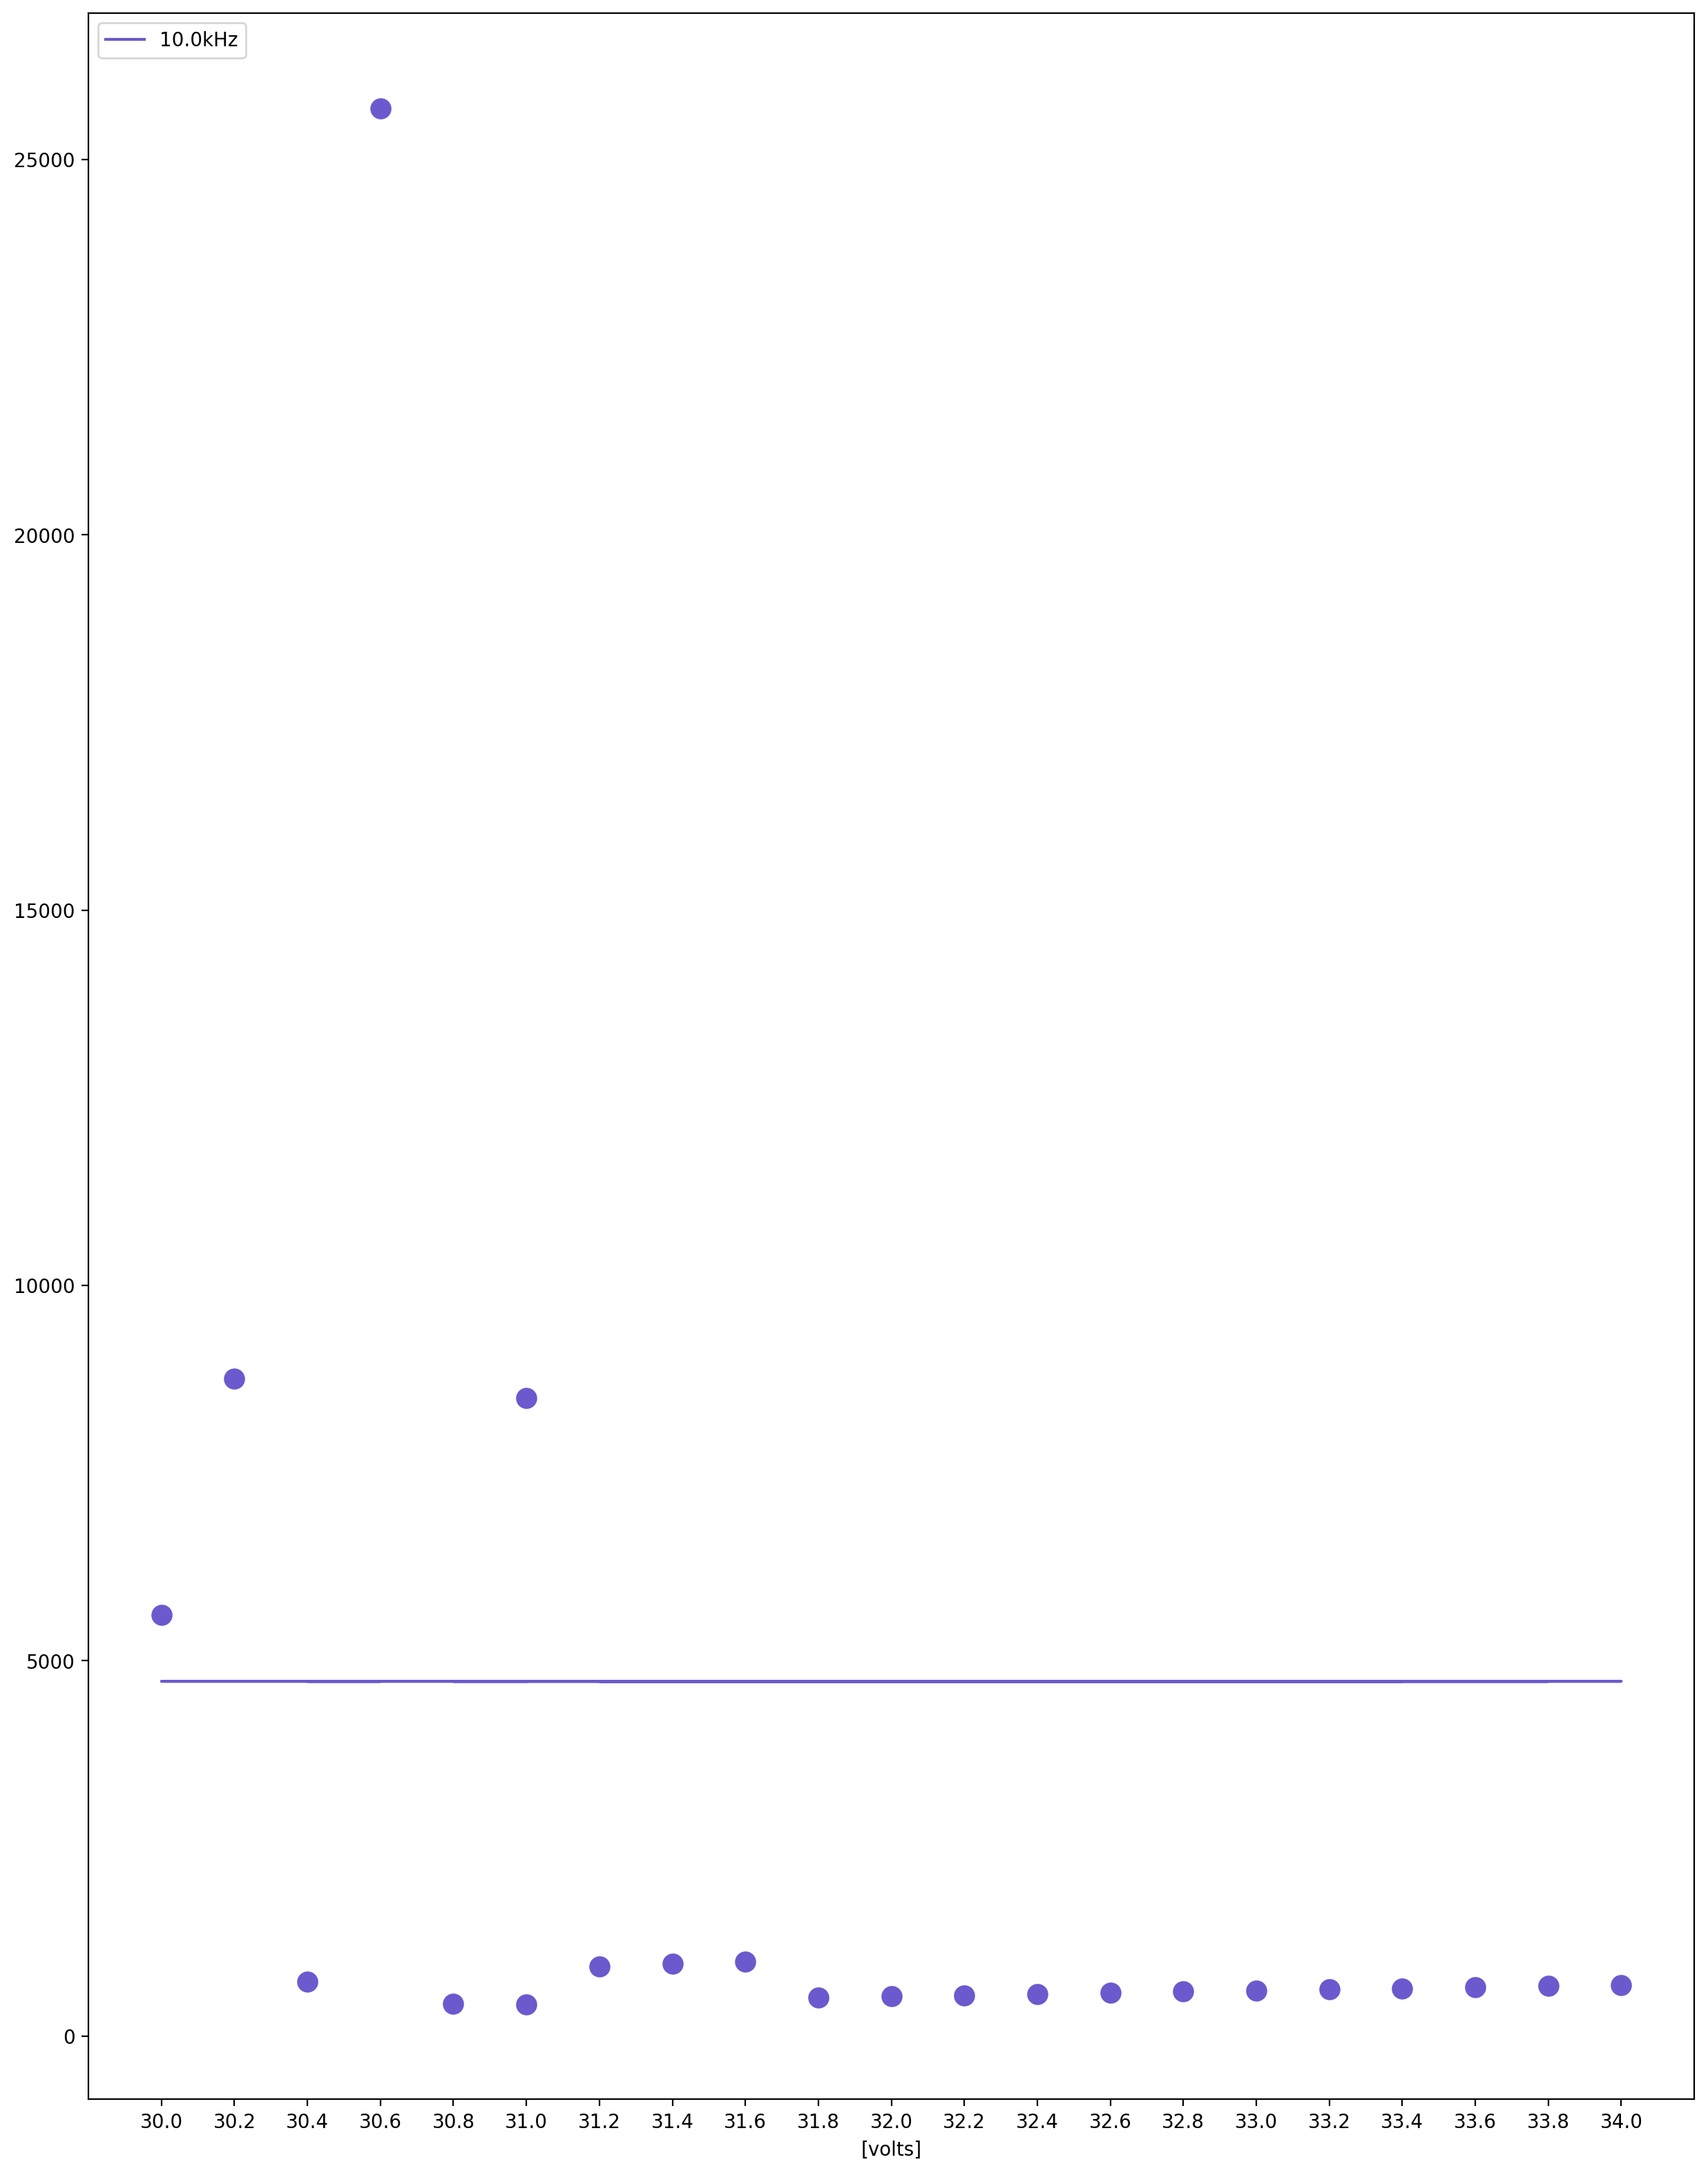

In [12]:
colors = ['slateblue', 'green', 'brown', 'yellow', 'red', 'blue', 'navy','magenta','orange','purple']
def line(x,a,b): return a*(x-b)
plt.figure(facecolor='white',figsize=(15,20))
for ii, freq in enumerate(frequencies_un[9:]):
    values = frequencies[freq]
    color = colors[ii]
    voltages = []
    gains = []
    errors = []
    for value in values:
        voltage, data_val = value
        gain, error = data_val
        #if freq == 10.0 and voltage < 31.8: continue
        #if freq == 7.0 and voltage < 31.0: continue
        #if freq == 5.0 and voltage < 30.4: continue
        if voltage in voltages:
            index = np.argwhere(np.asarray(voltages) == voltage)[0][0]
            old_err = errors[index]
            if gains[index] == gain: continue
            print(f'{voltage} already looped',end=' ')
            print(f'OLD GAIN {gains[index]} vs new {gain}')
            if error > old_err:
                print(f'{error} > {old_err} --> SKIPPED')
                continue
            else:
                gains[index] = gain
                errors[index] = error
                print(f'{error} < {old_err} --> REBASED')
                continue
        voltages.append(voltage)
        gains.append(gain)
        errors.append(error)
    if len(gains) == 0:
        print(freq,' : ',voltage)
        print(values)
    
    plt.errorbar([31.00],[418],yerr=[0.00001],fmt='o',ms=10,color=color)
    plt.errorbar(voltages,gains,yerr=errors,fmt='o',ms=10,color=color)
    popt,pcov = curve_fit(line,voltages,gains,sigma=errors,maxfev=1000000)
    plt.plot(voltages,line(voltages,*popt),color=color,label=str(freq)+'kHz')
    print(f'{freq:.02f}kHz ->  {popt[0]:.5f} ± {np.sqrt(np.abs(np.diag(pcov)))[1]:.5f}      ({color})')
    
plt.legend(loc='upper left')
plt.xlabel('[volts]')
plt.xticks(np.unique(voltages))
#plt.savefig(r'/Users/Tizi/Desktop/plotter.png')
plt.show()